# LABORATORIO DE INTELIGENCIA ARTIFICIAL 1

# Práctica 3: Clasificación Multiclase

+ __Estudiante 1:__ Alejandra Díaz Parra

## **0. Importar las librerías**

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

## **1. Cargar un conjunto de datos tabulares (0.5)**

### Wine Quality Data (Wine_Quality_Data.csv)

https://www.kaggle.com/datasets/ghassenkhaled/wine-quality-data

### 1.1 Ejercicio.

Cargue el conjunto de datos Wine_Quality_Data.csv

Indique breve y claramente en que consiste este dataset.

In [2]:
df = pd.read_csv('Wine_Quality_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Este dataset tiene información como el pH, color, calidad, cantidad de alcohol y otras características químicas de diferentes vinos.

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación (1.5)**

### 2.1 Ejercicio.

Determine la cantidad de observaciones y atributos e identifique la variable Target.

In [72]:
print("Atributos:")
df.columns

Atributos:


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [177]:
print("Cantidad de observaciones:")
print(len(df))

Cantidad de observaciones:
6497


In [89]:
print("Variable objetivo:")
y = df['quality']
df['quality'].value_counts()

Variable objetivo:


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### 2.2 Ejercicio.

Determine los tipos de datos de los atributos e identifique si hay problemas con los tipos de datos o con los nombres de los atributos. En caso de existir implemente una estrategia para tratarlos.

In [75]:
print("Tipos de datos de los atributos:")
df.info()

Tipos de datos de los atributos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


De lo anterior se puede observar que todas las variables son numéricas, a excepción de 'color', por lo que deberá ser transformada a numérica.

In [3]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df["color"]=L.fit_transform(df["color"])
df['color'].value_counts()

color
1    4898
0    1599
Name: count, dtype: int64

Usando label encoding, se le asignó el valor 1 al color "white", y el valor 0 al color "red"

### 2.3 Ejercicio.

Previsualice el contenido del dataframe

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [78]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

### 2.4 Ejercicio.

Lleve a cabo un análisis univariado del dataset y consigne sus observaciones.

In [7]:
df.describe(include ='all')

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

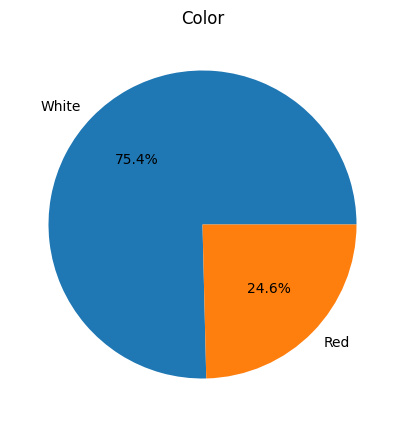

In [4]:
# grafico circular para la columna color
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(df['color'].value_counts(),labels=['White','Red'],autopct='%1.1f%%')
plt.title('Color')
plt.show()

En el anterior gráfico se ve que hay aproximadamente 3 veces más datos de vino de color blanco que de vino de color rojo

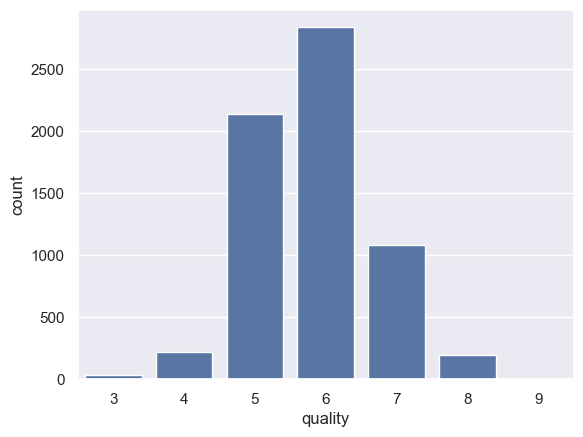

In [5]:
# grafico de barras para la columna quality
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="quality", data=df)


El anterior gráfico de barras muestra la distribución de los valores en la columna quality, indicando que la mayoría de vinos en el dataset tiene calidad 5 y 6, y mientras que los vinos con calidad 3, 4, 8 y 9 en total no llegan a ser una quinta parte de los vinos con calidad 6.

### 2.5 Ejercicio.

Determine la distribución de la variable Target. Indique claramente cuántas son las clases, la cantidad de registros de cada una de ellas y su porcentaje. Consigne sus observaciones.

In [10]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [11]:
df['quality'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

quality
6    43.651%
5    32.907%
7    16.608%
4     3.325%
8     2.971%
3     0.462%
9     0.077%
Name: proportion, dtype: object

### 2.6 Ejercicio.

Genere al menos 3 histogramas y consigne sus observaciones.

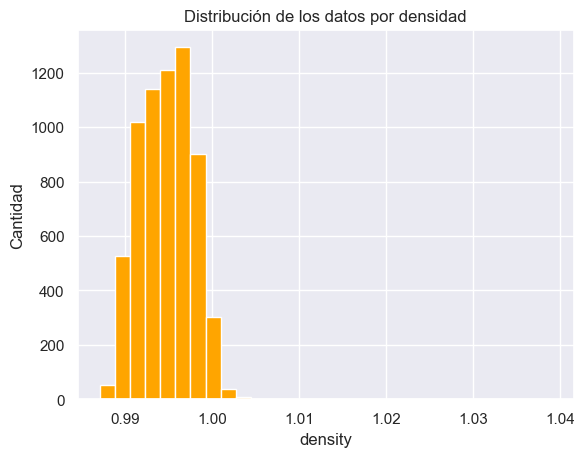

In [84]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

atribute = 'density'
valores = df[atribute].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
#n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='green')
plt.hist(valores, num_bins, density=False, facecolor='orange')
plt.xlabel(atribute)          #Texto en el eje x.
plt.ylabel('Cantidad')    #Texto en el eje y.
plt.title('Distribución de los datos por densidad')  #Título del gráfico. 
plt.grid(True)           #Activamos la cuadrícula.
plt.show()               #Mostramos el gráfico. 

La mayoría de los vinos usados en este estudio presentan una densidad entre 0.99 y 1.

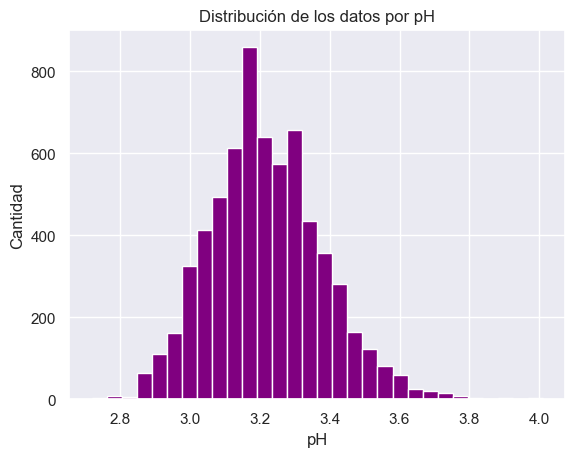

In [85]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

atribute = 'pH'
valores = df[atribute].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
#n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='green')
plt.hist(valores, num_bins, density=False, facecolor='purple')
plt.xlabel(atribute)          #Texto en el eje x.
plt.ylabel('Cantidad')    #Texto en el eje y.
plt.title('Distribución de los datos por pH')  #Título del gráfico. 
plt.grid(True)           #Activamos la cuadrícula.
plt.show()               #Mostramos el gráfico. 

La mayoría de los vinos usados en este estudio tienen un pH mayor a 3 y menor a 3.4, lo cual se puede considerar como ácido.

Text(0.5, 1.0, 'Calidad por color')

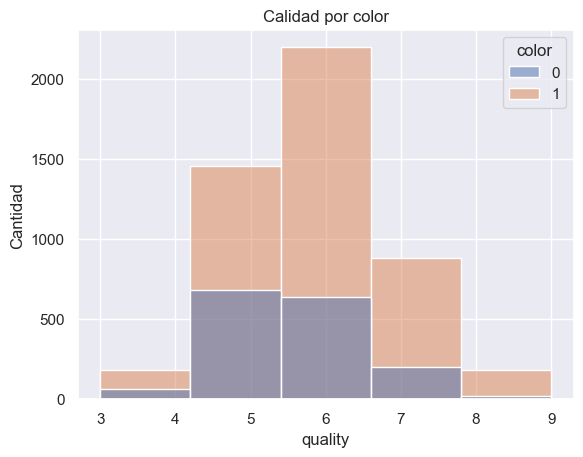

In [86]:
sns.histplot(data     = df, 
             x        = 'quality',
             bins     = 5,
             hue      = 'color',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('quality') #Texto en el eje x.
plt.ylabel('Cantidad')              #Texto en el eje y.
plt.title('Calidad por color')             #Título del gráfico. 

La mayoría de los vinos usados en este estudio presentan una calidad entre 5 y 7. Hay una proporción similar de vinos rojos y blancos cuya calidad es 5. Hay una cantidad similar entre vinos rojos cuya calidad es 5 y 6. La mayor parte de vinos de calidad de 6 son blancos. Una gran cantidad de vinos blancos tiene calidad 6.
Como la distribución de los datos de acuerdo a su calidad está desbalanceada, es posible que esto afecte negativamente el desempeño de los modelos que se implementen más adelante.

### 2.7 Ejercicio.

Realice el análisis bivariado del dataset y consigne sus observaciones.

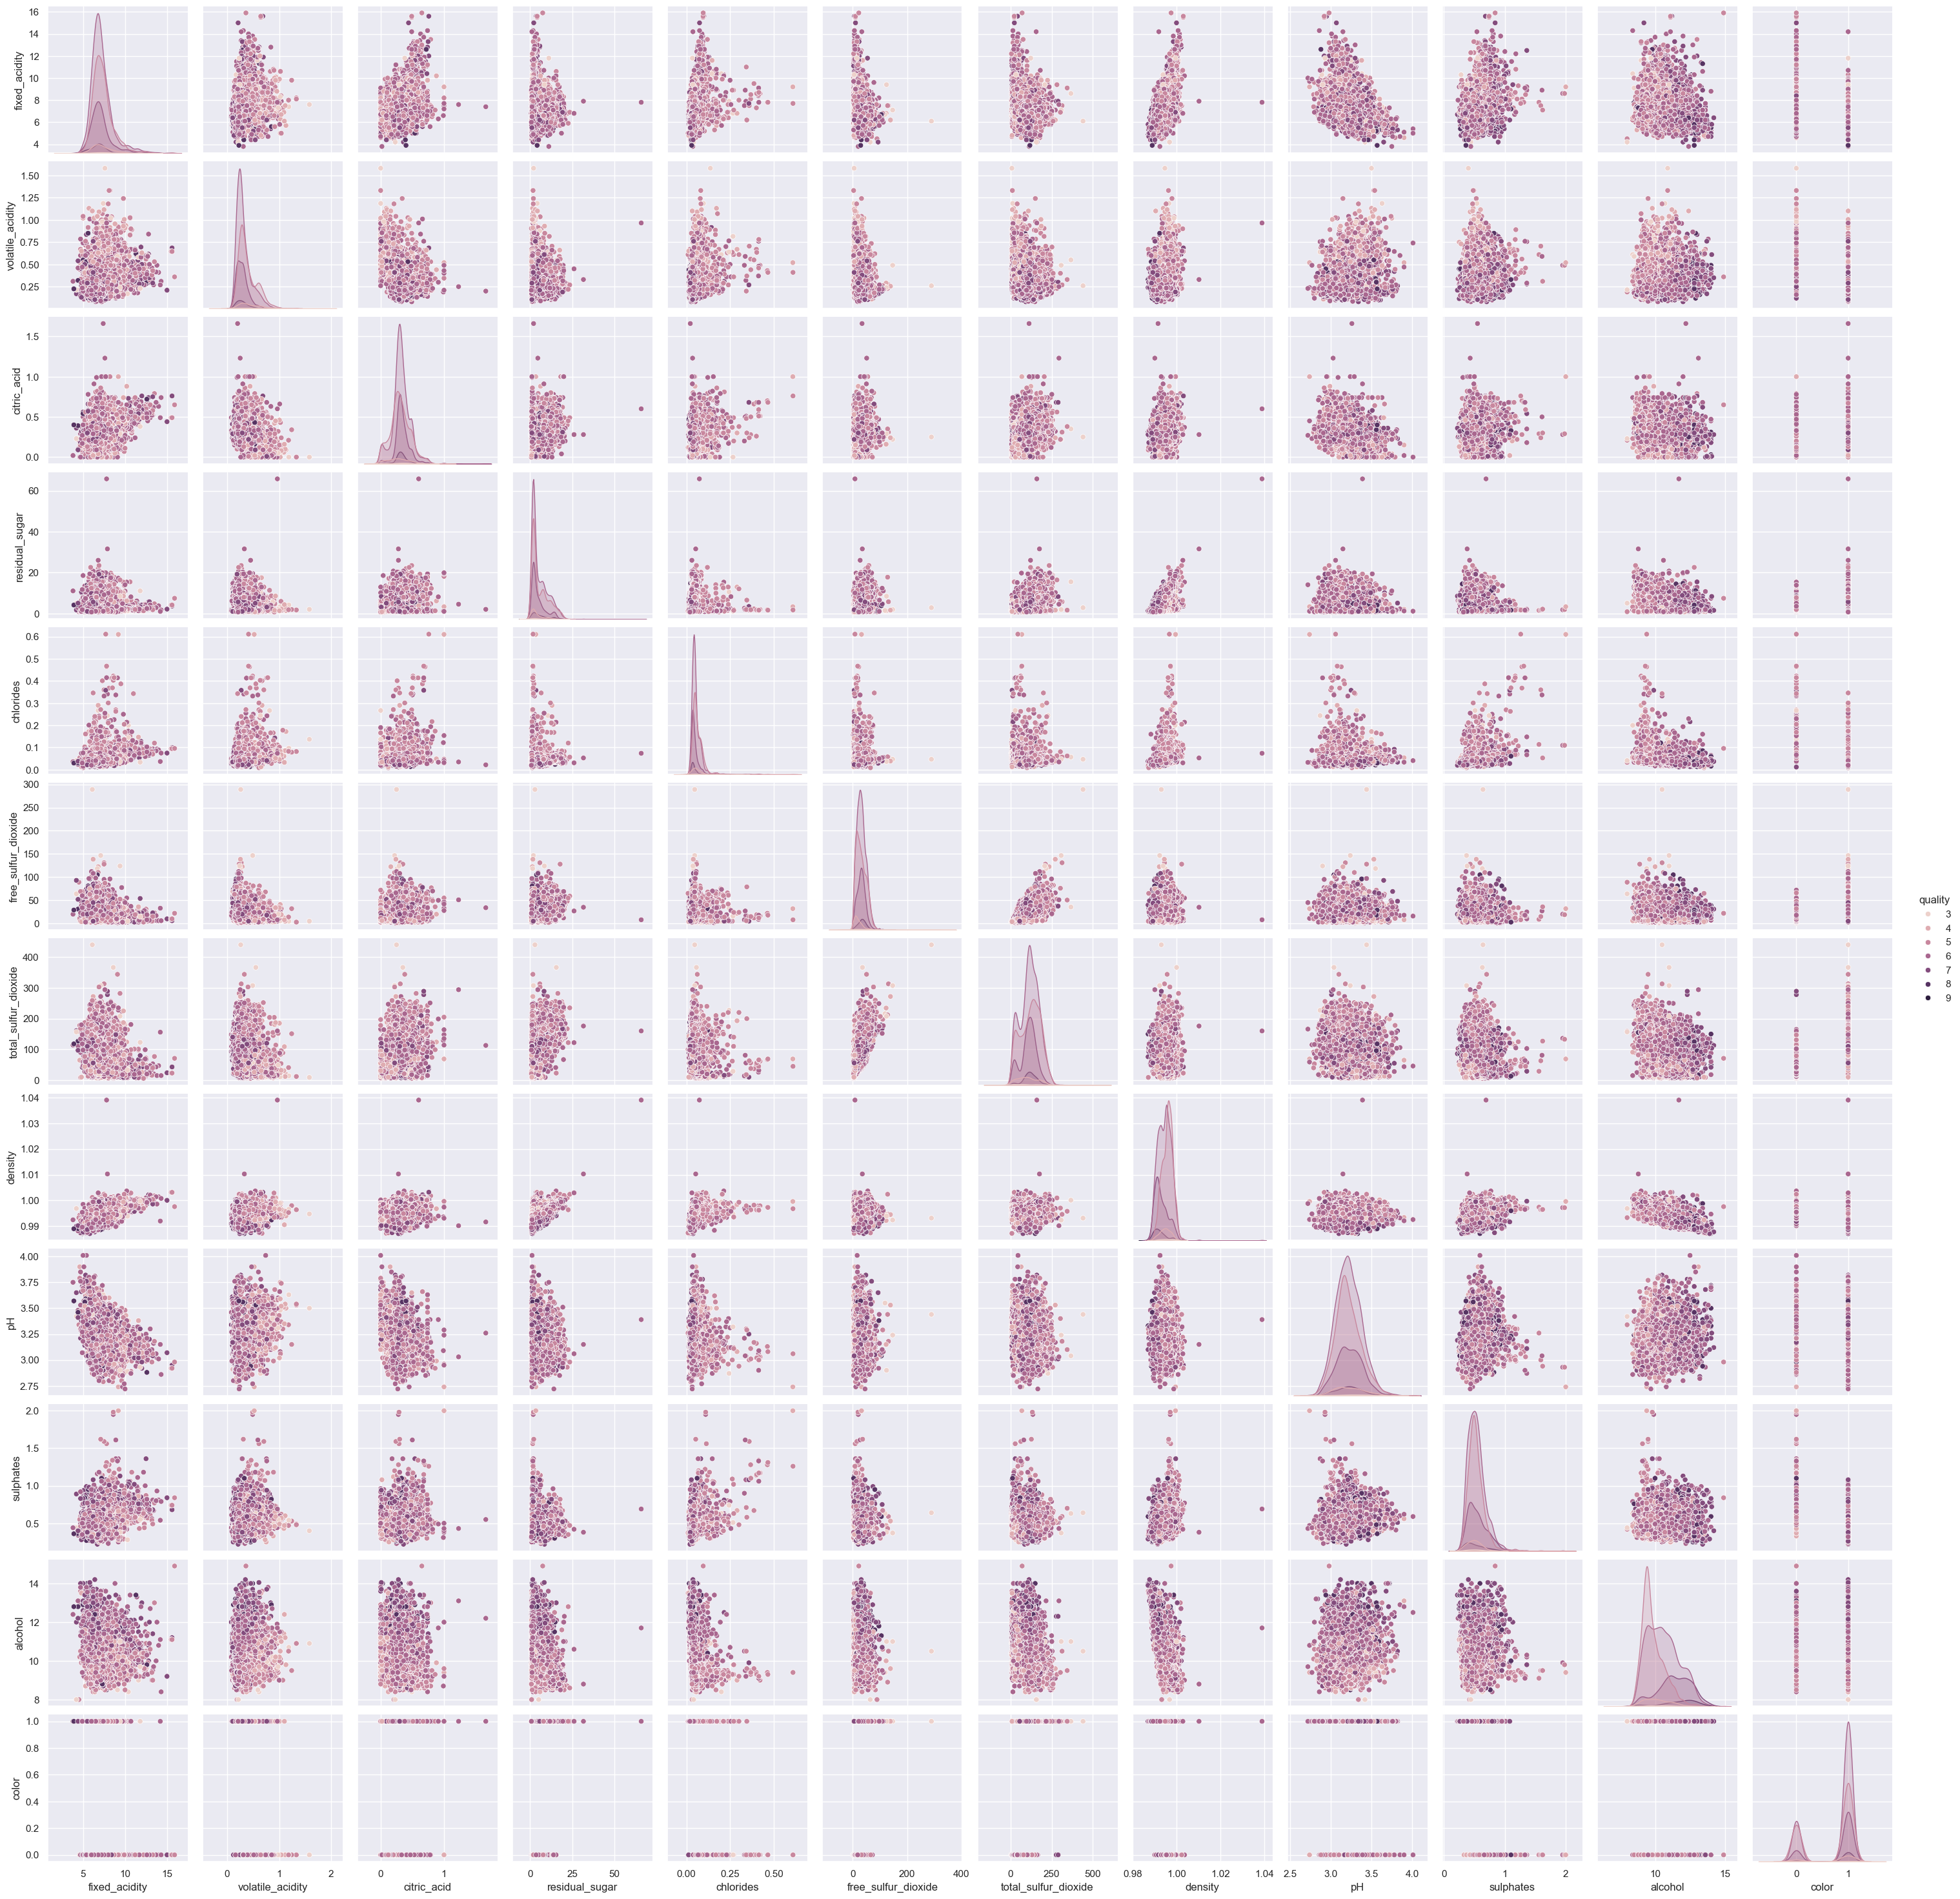

In [26]:
sns.pairplot(df, hue = 'quality')

### 2.8 Ejercicio.

Indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuenta hacer el procesamiento adecuado de los atributos que no sean numéricos.

<Axes: >

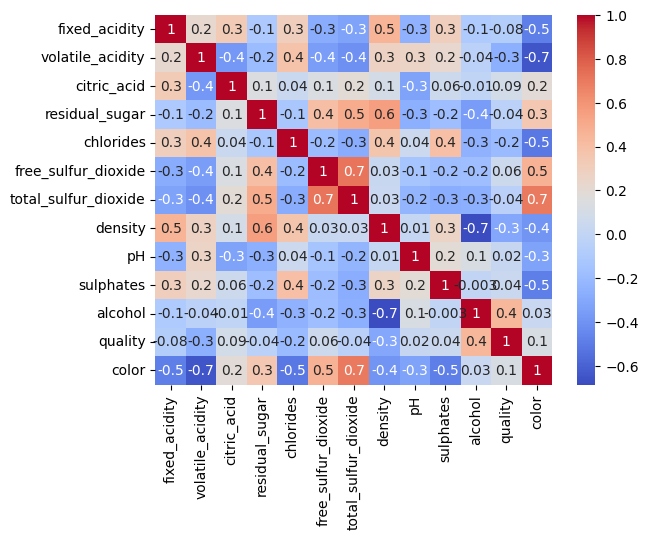

In [179]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Correlación de los atributos con la variable "quality"
 + alcohol: 0.4
 + density: -0.3
 + volatile_acidity: -0.3
 + chlorides: -0.2
 + color: 0.1
 + citric_acid: 0.09
 + fixed_acidity: -0.08
 + free_sulfur_dioxide: 0.06
 + residual_sugar: 0.04
 + total_sulfur_dioxide: -0.04
 + sulphates: 0.04
+ pH: 0.02

### 2.9 Ejercicio.

Identifique si hay datos repetidos y datos nulos. En caso de existir implemente una estrategia para tratarlos.

In [4]:
df_copy = df.copy()

In [14]:
df_copy.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

El dataset no tiene datos nulos.

In [15]:
df_copy.duplicated().sum()

1177

El dataset presenta 1177 valores duplicados, los cuales serán eliminados.

In [5]:
df_copy = df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

### 2.10 Ejercicio.

Identifique si hay outliers. En caso de existir implemente una estrategia para tratarlos.

In [17]:
import numpy as np

def outliers(df_copy, atribute):

    arr1 = df_copy[atribute].values

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]



    outliers_l_p = (outliers_l.size/len(df_copy[atribute]))*100
    outliers_u_p = (outliers_u.size/len(df_copy[atribute]))*100


    if(outliers_l.size != 0):
      print('Lower outliers in {} represent {:.4f}% of data'.format(atribute,outliers_l_p))
      print('>>>Lower bound: {}'.format(lower_bound))
      #print('Lower outliers in {} : {}'.format(atribute,outliers_l))
    if(outliers_u.size != 0):
      print('Upper outliers in {} represent {:.4f}% of data'.format(atribute,outliers_u_p))
      print('>>>Upper bound: {}'.format(upper_bound))
      #print('Upper outliers in {} : {}'.format(atribute,outliers_u))
    
    


In [18]:
for col in df_copy.columns:
  outliers(df_copy, col)

Lower outliers in fixed_acidity represent 0.1316% of data
>>>Lower bound: 4.450000000000001
Upper outliers in fixed_acidity represent 5.5827% of data
>>>Upper bound: 9.65
Upper outliers in volatile_acidity represent 5.2444% of data
>>>Upper bound: 0.6799999999999999
Upper outliers in citric_acid represent 2.6880% of data
>>>Upper bound: 0.6400000000000001
Upper outliers in residual_sugar represent 2.7256% of data
>>>Upper bound: 16.05
Upper outliers in chlorides represent 4.4549% of data
>>>Upper bound: 0.10800000000000001
Upper outliers in free_sulfur_dioxide represent 0.8271% of data
>>>Upper bound: 78.5
Upper outliers in total_sulfur_dioxide represent 0.1880% of data
>>>Upper bound: 272.125
Upper outliers in density represent 0.0564% of data
>>>Upper bound: 1.0036250000000002
Lower outliers in pH represent 0.0752% of data
>>>Lower bound: 2.7799999999999994
Upper outliers in pH represent 0.9774% of data
>>>Upper bound: 3.66
Upper outliers in sulphates represent 3.0639% of data
>>>Upp

Para tratar los outliers se van a eliminar todos los valores en las columnas que presenten outliers, que cumplan con estar por encima o por debajo de los límites mostrados anteriormente.

In [6]:
# erase all outliers
df_copy = df_copy[(df_copy['fixed_acidity'] > 4.45) | (df_copy['fixed_acidity'] < 9.65)]
df_copy = df_copy[df_copy['volatile_acidity'] < 0.679]
df_copy = df_copy[df_copy['citric_acid'] < 0.64]
df_copy = df_copy[df_copy['residual_sugar'] < 16.05]
df_copy = df_copy[df_copy['chlorides'] < 0.108]
df_copy = df_copy[df_copy['free_sulfur_dioxide'] < 78.5]
df_copy = df_copy[df_copy['total_sulfur_dioxide'] < 272.125]
df_copy = df_copy[df_copy['density'] < 1.004]
df_copy = df_copy[(df_copy['pH'] > 2.78) | (df_copy['pH'] < 3.66)]
df_copy = df_copy[df_copy['sulphates'] < 0.855]
df_copy = df_copy[df_copy['alcohol'] < 14.25]
#df_copy = df_copy[(df_copy['quality'] > 3.5) | (df_copy['quality'] < 7.5)]


In [ ]:
# Just testing, DONT RUN
'''''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled =df_scaled.drop(['quality','color'], axis=1)
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.describe()
'''''

In [ ]:
# Just testing, DONT RUN
# scale data using robust scaler
'''''
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_copy = df_copy.drop(columns=['quality','color'])
df_copy = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)
df_copy.head()
'''''

In [20]:
df_copy.value_counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH    sulphates  alcohol  quality  color
3.8            0.310             0.02         11.10           0.036      20.0                 114.0                 0.99248  3.75  0.44       12.4     6        1        1
7.3            0.320             0.34         6.60            0.032      24.0                 112.0                 0.99505  3.22  0.46       9.8      6        1        1
               0.340             0.21         3.20            0.050      14.0                 136.0                 0.99360  3.25  0.44       10.2     5        1        1
               0.330             0.47         2.10            0.077      5.0                  11.0                  0.99580  3.33  0.53       10.3     6        0        1
                                 0.40         6.85            0.038      32.0                 138.0                 0.99200  3.03  0.30       11.9    

### 2.11 Ejercicio.

Depués de haber hecho la limpieza básica, indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

In [7]:
df_copy = df_copy.reset_index(drop=True)

In [22]:
df_copy.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.2              0.28         0.56             1.9      0.075   
1            7.4              0.66         0.00             1.8      0.075   
2            7.9              0.60         0.06             1.6      0.069   
3            7.3              0.65         0.00             1.2      0.065   
4            7.8              0.58         0.02             2.0      0.073   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  59.0   0.9964  3.30       0.46   
3                 15.0                  21.0   0.9946  3.39       0.47   
4                  9.0                  18.0   0.9968  3.36       0.57   

   alcohol  quality  color  
0      9.8        6      0  
1      9.4        5      0  
2      9.4        5      0  
3     10.0        7      0  
4      9.5        7      0

<Axes: >

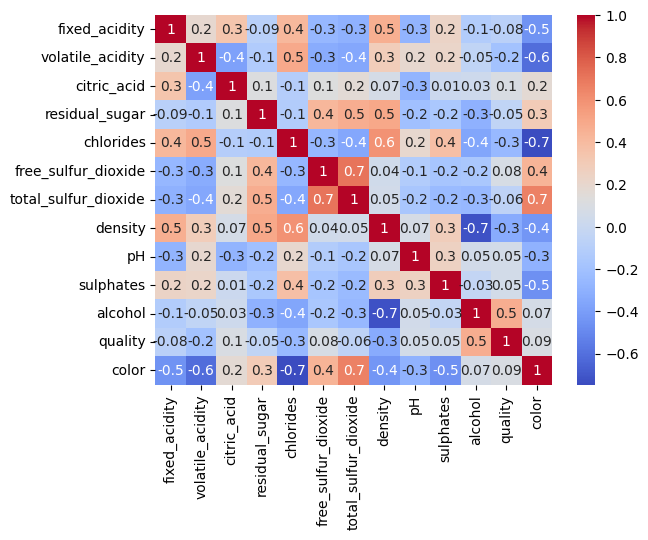

In [11]:
import seaborn as sns
sns.heatmap(df_copy.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Correlación de los atributos con la variable "quality"
 + alcohol: 0.5
 + density: -0.3
 + chlorides: -0.3
 + volatile_acidity: -0.2
 + citric_acid: 0.1
 + color: 0.09
 + fixed_acidity: -0.08
 + free_sulfur_dioxide: 0.08
 + total_sulfur_dioxide: -0.06
 + sulphates: 0.05
 + residual_sugar: -0.05
 + pH: 0.05
 

# **3. Modelo y 4. Evaluación (3.0)**

### 3.1 Ejercicio.

Seleccione el conjunto de atributos que va a usar para entrenar el primer modelo de clasificación. Indique claramente por qué escogió esos atributos.

De la matriz de correlación anterior se puede observar que los atributos "density" y "alcohol" presentan una correlación alta entre ellos, por lo que, al tener menor correlación con la variable objetivo, se descartó el atributo "density". A su vez "total_sulfur_dioxide" presenta una alta correlación con los atributos "free_sulfur_dioxide" y "color", por lo cual se decidió descartar el primero. Teniendo en cuenta lo anterior, la lista final de atributos para entrenar el modelo consta de:
 + alcohol
 + volatile_acidity
 + chlorides
 + color
 + citric_acid
 + fixed_acidity
 + free_sulfur_dioxide
 + residual_sugar
 + sulphates
 + pH

In [8]:
# drop all columns with correlation less than 0.1
df_copy = df_copy.drop(["density", "total_sulfur_dioxide"], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        4435 non-null   float64
 1   volatile_acidity     4435 non-null   float64
 2   citric_acid          4435 non-null   float64
 3   residual_sugar       4435 non-null   float64
 4   chlorides            4435 non-null   float64
 5   free_sulfur_dioxide  4435 non-null   float64
 6   pH                   4435 non-null   float64
 7   sulphates            4435 non-null   float64
 8   alcohol              4435 non-null   float64
 9   quality              4435 non-null   int64  
 10  color                4435 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 363.9 KB


### 3.2 Ejercicio.

Construya cuatro modelos de clasificación utilizando los siguientes algoritmos:

- KNN
- Regresión Logística
- Ensembles.
- Otro método de su elección.

Entrene y evalúe el desempeño de los modelos por clase usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles clases se clasifican mejor, etc.

Compare el desempeño de los modelos usando las diferentes métricas y la curva ROC. Consigne sus observaciones.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

y = df_copy['quality'].values
X = df_copy.drop(['quality'], axis=1).values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<class 'numpy.ndarray'>
(4435,)
<class 'numpy.ndarray'>
(4435, 10)


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### KNN

In [17]:
# knn model using grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
#knn_cv.fit(X_train, y_train)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)


{'n_neighbors': 31}


In [19]:
knn_best = knn_cv.best_estimator_
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

Desempeño general del modelo

In [20]:
#print train accuracy
print(f'Train Accuracy - : {knn_cv.score(X_train,y_train):.3f}')
# print train precision
#y_pred = knn_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_train_pred, average="macro"):.3f}')
# print train recall
print(f'Train Recall - : {recall_score(y_train, y_train_pred, average="macro"):.3f}')
# print train f1-score
print(f'Train F1-score - : {f1_score(y_train, y_train_pred, average="macro"):.3f}')

# print test accuracy
print(f'Test Accuracy - : {knn_cv.score(X_test,y_test):.3f}')
#print test precision
#y_pred = knn_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_test_pred, average="macro"):.3f}')
#print test recall
print(f'Test Recall - : {recall_score(y_test, y_test_pred, average="macro"):.3f}')
#print test f1-score
print(f'Test F1-score - : {f1_score(y_test, y_test_pred, average="macro"):.3f}')

Train Accuracy - : 0.572
Train Precision - : 0.387
Train Recall - : 0.238
Train F1-score - : 0.238


C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy - : 0.537
Test Precision - : 0.264
Test Recall - : 0.253
Test F1-score - : 0.249


C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [56]:
# performance by class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        38
           5       0.56      0.55      0.55       275
           6       0.53      0.72      0.61       406
           7       0.49      0.25      0.33       135
           8       0.00      0.00      0.00        30

    accuracy                           0.54       887
   macro avg       0.26      0.25      0.25       887
weighted avg       0.49      0.54      0.50       887



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Regresión Logística

In [57]:
# logistic regression using gridsearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

param_grid = {'C': np.arange(1, 30), 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [1000, 3000, 5000]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_)

{'C': 5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


Desempeño general del modelo

In [58]:
# print accuracy
print(f'Train Accuracy - : {logreg_cv.score(X_train,y_train):.3f}')
# print precision
y_pred = logreg_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy
print(f'Test Accuracy - : {logreg_cv.score(X_test,y_test):.3f}')
# print precision
y_pred = logreg_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')

Train Accuracy - : 0.542
Train Precision - : 0.232
Train Recall - : 0.211
Train F1-score - : 0.205
Test Accuracy - : 0.548
Test Precision - : 0.273
Test Recall - : 0.250
Test F1-score - : 0.244


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [59]:
#performance by class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        38
           5       0.59      0.57      0.58       275
           6       0.53      0.75      0.62       406
           7       0.52      0.18      0.27       135
           8       0.00      0.00      0.00        30

    accuracy                           0.55       887
   macro avg       0.27      0.25      0.24       887
weighted avg       0.50      0.55      0.50       887



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Ensembles

In [60]:
# ensembles using gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

#select criterion
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt'] # PROBAR CON LOG2 EN VEZ DE AUTO
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {  'criterion' : criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}


Desempeño general del modelo

In [61]:
# print accuracy
print(f'Train Accuracy - : {rf_cv.score(X_train,y_train):.3f}')
# print precision
y_pred = rf_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy
print(f'Test Accuracy - : {rf_cv.score(X_test,y_test):.3f}')
# print precision
y_pred = rf_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')


Train Accuracy - : 0.555
Train Precision - : 0.258
Train Recall - : 0.212
Train F1-score - : 0.205
Test Accuracy - : 0.531
Test Precision - : 0.272
Test Recall - : 0.226
Test F1-score - : 0.211


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        38
           5       0.59      0.46      0.52       275
           6       0.51      0.83      0.63       406
           7       0.53      0.07      0.12       135
           8       0.00      0.00      0.00        30

    accuracy                           0.53       887
   macro avg       0.27      0.23      0.21       887
weighted avg       0.50      0.53      0.47       887



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Redes Neuronales

In [11]:
# use gridsearch to find the best parameters
mlp = MLPClassifier(random_state = 0, max_iter = 500)
nn_Grid = GridSearchCV(estimator = mlp, param_grid =  { 'hidden_layer_sizes': [(10,8,5), (20,10,5), (15,10,5)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'] } )
nn_Grid.fit(X_train, y_train)

# best parameters
print(nn_Grid.best_params_)
                            

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\A

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 10, 5), 'learning_rate': 'constant', 'solver': 'adam'}


Desempeño general del modelo

In [12]:
# print accuracy for train
print(f'Train Accuracy - : {nn_Grid.score(X_train,y_train):.3f}')
# print precision for train
y_pred = nn_Grid.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall for train
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score for train
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy for test
print(f'Test Accuracy - : {nn_Grid.score(X_test,y_test):.3f}')
# print precision for test
y_pred = nn_Grid.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall for test
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score for test
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')

Train Accuracy - : 0.561
Train Precision - : 0.312
Train Recall - : 0.244
Train F1-score - : 0.250
Test Accuracy - : 0.545
Test Precision - : 0.358
Test Recall - : 0.278
Test F1-score - : 0.287


C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # y pred predice los valores de x_test

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.57      0.11      0.18        38
           5       0.58      0.55      0.56       275
           6       0.54      0.70      0.61       406
           7       0.46      0.30      0.36       135
           8       0.00      0.00      0.00        30

    accuracy                           0.54       887
   macro avg       0.36      0.28      0.29       887
weighted avg       0.52      0.54      0.52       887



C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

#### Comparación entre las métricas generales de cada modelo.

<img src="comparacion.png">

Como se puede apreciar en la imagen anterior, los resultados de los modelos no son buenos. Para entender mejor esto, se debe tener en cuenta el siguiente gráfico.

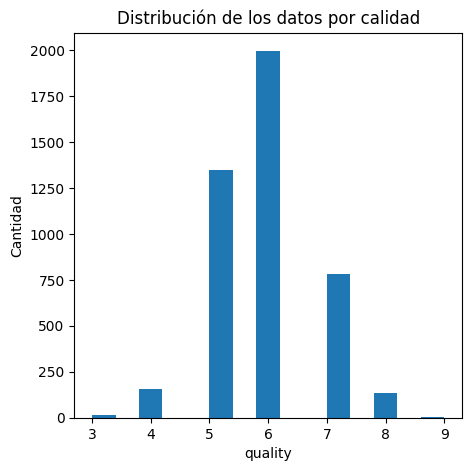

In [26]:
# histograma de quality
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(df_copy['quality'], bins=15)
plt.xlabel('quality')
plt.ylabel('Cantidad')
plt.title('Distribución de los datos por calidad')
plt.show()

En el anterior histograma se puede apreciar que la distribución de los datos entre las diferentes clases del atributo "quality" es desbalanceada, teniendo clases como 5 y 6 muchos más datos que clases como 3, 4, y 9 juntas. Esto probablemente ocasinó que los modelos no lograran aprender correctamente el comportamiento de los datos, lo cual se refleja en los bajos resultados de los valores de las métricas de estos.

#### Comparación de las métricas por clase de cada modelo.

<img src="precision-por-clase.jpg">

<img src="recall-por-clase.jpg">

<img src="f1-por-clase.jpg">

Como se puede apreciar en los gráficos anteriores, la mayoría de los modelos presenta valores bajos en sus métricas para las clases 3, 4 y 8, y valores altos para las clases 5, 6 y, en menor proporción, la clase 7. La excepción a estas tendencias es el modelo de redes neuronales, que presenta un desempeño mejor para la clase 4 en comparación con los demás modelos. Estos resultados se corresponden con la distribución de los datos mostrada en el histograma de más arriba, lo cual explica que el modelo se ajuste mejor a las clases que tienen mayor cantidad de datos.

### 3.3 Ejercicio.

Utilice Stratified Cross-Validation para evaluar la calidad de los modelos.

Indique cuál es la utilidad que tiene el método de evaluación Stratified Cross-Validation. Consigne sus observaciones respecto a la implementación y los resultados obtenidos.

Stratified Cross-Validation sirve para evaluar que los modelos estén correctamente entrenados, buscando evitar errores de entrenamiento y de pruba, subestimar el error,sobreaprendizaje, y juzgar los resultados del modelo ante datos nuevos. Este método funciona particionando los datos de entrada en subconjuntos de igual tamaño, y variando la manera en que se escogen esto subconjuntos para entrenar y validar el modelo. El desempeño final es calculado promediando el desempeño de cada iteración.

#### KNN

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
skfold = StratifiedKFold(n_splits=10, shuffle=False)

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=skfold)

#fit model to data
knn_gscv.fit(X_train, y_train)

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [35]:
knn_gscv.best_params_

{'n_neighbors': 38}

In [36]:
knn_best = knn_gscv.best_estimator_
y_test_pred = knn_best.predict(X_test)

In [37]:
from sklearn import metrics

def eval_classifier(y,y_pred):

    cm = metrics.confusion_matrix(y,y_test_pred)  #Una matriz de confusión para todas las categorías.
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    print('TPR: %.4f' % TPR)
    print('FPR: %.4f' % FPR)
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    f1 = 2*(prec*TPR)/(prec+TPR)
    print('Accuracy: %.4f' % acc)
    print('Precision: %.4f' % prec)
    print('Recall: %.4f' % TPR)
    print('F1 score: %.4f' % prec)
   # disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
   # disp.plot()
   # plt.show()

In [33]:
eval_classifier(y_test, y_test_pred)

TPR: 1.0000
FPR: nan
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000


C:\Users\aleja\AppData\Local\Temp\ipykernel_5428\604944165.py:11: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP/(FP+TN)


#### Logistic Regression

In [39]:
# standard cross validation for logistic regression with grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg2 = LogisticRegression()
param_grid = {'C': np.arange(1, 30), 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [1000, 3000, 5000]}
skfold = StratifiedKFold(n_splits=10, shuffle=False)
logreg_gscv = GridSearchCV(logreg2, param_grid, cv=skfold)
logreg_gscv.fit(X_train, y_train)

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_iter': [1000, 3000, 5000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [40]:
logreg_gscv.best_params_

{'C': 4, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [41]:
logreg_best = logreg_gscv.best_estimator_
y_test_pred = logreg_best.predict(X_test)

In [43]:
from sklearn import metrics

def eval_classifier(y,y_pred):

    cm = metrics.confusion_matrix(y,y_pred)  #Una matriz de confusión para todas las categorías.
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    print('TPR: %.4f' % TPR)
    print('FPR: %.4f' % FPR)
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    f1 = 2*(prec*TPR)/(prec+TPR)
    print('Accuracy: %.4f' % acc)
    print('Precision: %.4f' % prec)
    print('Recall: %.4f' % TPR)
    print('F1 score: %.4f' % prec)
   # disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
   # disp.plot()
   # plt.show()

In [44]:
eval_classifier(y_test, y_test_pred)

TPR: nan
FPR: nan
Accuracy: nan
Precision: nan
Recall: nan
F1 score: nan


C:\Users\aleja\AppData\Local\Temp\ipykernel_5428\604944165.py:10: RuntimeWarning: invalid value encountered in scalar divide
  TPR = TP/(TP+FN)
C:\Users\aleja\AppData\Local\Temp\ipykernel_5428\604944165.py:11: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP/(FP+TN)
C:\Users\aleja\AppData\Local\Temp\ipykernel_5428\604944165.py:14: RuntimeWarning: invalid value encountered in scalar divide
  acc = (TP+TN)/(TP+TN+FP+FN)
C:\Users\aleja\AppData\Local\Temp\ipykernel_5428\604944165.py:15: RuntimeWarning: invalid value encountered in scalar divide
  prec = TP/(TP+FP)


#### Ensemble

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier()

#select criterion
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt'] # PROBAR CON LOG2 EN VEZ DE AUTO
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {  'criterion' : criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

skfold = StratifiedKFold(n_splits=10, shuffle=False)

rf_gscv = GridSearchCV(rf2, param_grid, cv=skfold)
rf_gscv.fit(X_train, y_train)


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [33]:
rf_gscv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 41}

In [34]:
rf_best = rf_gscv.best_estimator_
y_test_pred = rf_best.predict(X_test)

In [35]:
from sklearn import metrics

def eval_classifier(y,y_pred):

    cm = metrics.confusion_matrix(y,y_pred)  #Una matriz de confusión para todas las categorías.
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    print('TPR: %.4f' % TPR)
    print('FPR: %.4f' % FPR)
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    f1 = 2*(prec*TPR)/(prec+TPR)
    print('Accuracy: %.4f' % acc)
    print('Precision: %.4f' % prec)
    print('Recall: %.4f' % TPR)
    print('F1 score: %.4f' % prec)
   # disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
   # disp.plot()
   # plt.show()

In [36]:
eval_classifier(y_test, y_test_pred)

TPR: nan
FPR: nan
Accuracy: nan
Precision: nan
Recall: nan
F1 score: nan


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6408\604944165.py:10: RuntimeWarning: invalid value encountered in scalar divide
  TPR = TP/(TP+FN)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6408\604944165.py:11: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP/(FP+TN)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6408\604944165.py:14: RuntimeWarning: invalid value encountered in scalar divide
  acc = (TP+TN)/(TP+TN+FP+FN)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6408\604944165.py:15: RuntimeWarning: invalid value encountered in scalar divide
  prec = TP/(TP+FP)


#### Redes Neuronales

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

mlp2 = MLPClassifier(random_state = 0, max_iter = 500)

skfold = StratifiedKFold(n_splits=10, shuffle=False)

nn_gscv = GridSearchCV(estimator = mlp, param_grid =  { 'hidden_layer_sizes': [(10,8,5), (20,10,5), (15,10,5)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'] } )
nn_gscv.fit(X_train, y_train)

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aleja\A

GridSearchCV(estimator=MLPClassifier(max_iter=500, random_state=0),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 8, 5), (20, 10, 5),
                                                (15, 10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [15]:
nn_gscv.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (15, 10, 5),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [16]:
nn_best = nn_gscv.best_estimator_
y_test_pred = nn_best.predict(X_test)

In [17]:
from sklearn import metrics

def eval_classifier(y,y_pred):

    cm = metrics.confusion_matrix(y,y_pred)  #Una matriz de confusión para todas las categorías.
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    print('TPR: %.4f' % TPR)
    print('FPR: %.4f' % FPR)
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    f1 = 2*(prec*TPR)/(prec+TPR)
    print('Accuracy: %.4f' % acc)
    print('Precision: %.4f' % prec)
    print('Recall: %.4f' % TPR)
    print('F1 score: %.4f' % prec)
   # disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
   # disp.plot()
   # plt.show()

In [18]:
eval_classifier(y_test, y_test_pred)

TPR: 1.0000
FPR: nan
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000


C:\Users\aleja\AppData\Local\Temp\ipykernel_6788\604944165.py:11: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP/(FP+TN)


### 3.4 Ejercicio

Modifique uno de los modelos de tal manera que el Accuracy (macro) se acerque lo más posible a 0.99. Recuerde que puede cambiar de atributos o los hiperparámetros del modelo. Indique por qué escogió ese modelo y qué cambios realizó.